In [1]:
import os
import pathlib
import joblib
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as skm

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load data
data = pd.read_csv(os.path.join(pathlib.Path.home(), "stat-5610-project", "data", "train.csv"))
x_data = np.array(data[data.columns.drop("Y")].values)
y_data = data["Y"].values

# Train/ test split
idx = list(range(len(y_data)))
train_idx, test_idx = skm.train_test_split(idx, random_state=1)
x_train, y_train = x_data[train_idx, :], y_data[train_idx]
x_test, y_test = x_data[test_idx, :], y_data[test_idx]

In [4]:
loaded_gs = joblib.load('/projects/emco4286/data/stats/try4/grid_search_model.joblib')

In [45]:
list_of_dicts = loaded_gs.cv_results_["params"]
params = list_of_dicts[-1]
clf = RandomForestClassifier(**params)
results = clf.fit(x_train, y_train)
preds = results.predict(x_test)
f1 = f1_score(y_test, preds)

In [54]:
entropy_35_16_10_100 = list_of_dicts[-8]
entropy_35_16_12_100 = list_of_dicts[-6]
entropy_35_16_14_100 = list_of_dicts[-4]
entropy_35_16_16_100 = list_of_dicts[-2]

list_of_params = [entropy_35_16_10_100, entropy_35_16_12_100, entropy_35_16_14_100, entropy_35_16_16_100]

In [10]:
np.arange(0.5, 1, 0.05)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [64]:
param_subset = [c for c in list_of_dicts if ((c["criterion"] =="gini" and c["n_estimators"] ==100) and (c["min_samples_leaf"]*2< c["min_samples_split"]) and c["max_depth"] >= 10)]
my_params = param_subset[:6]

In [69]:
# list_of_dicts = loaded_gs.cv_results_["params"]
f1_scores = []
for p in my_params:
    clf = RandomForestClassifier(**p)
    results = clf.fit(x_train, y_train)
    preds = results.predict(x_test)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)

In [72]:
my_params

[{'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 6,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 8,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 12,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 14,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 16,
  'n_estimators': 100}]

Text(0.5, 1.0, 'Random Forest of 100 Trees')

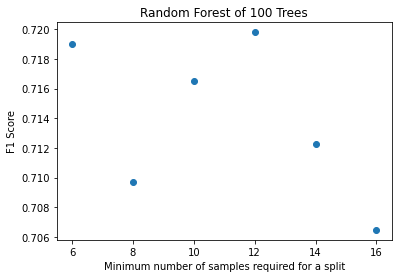

In [75]:
fig, ax = plt.subplots()

x = range(6, 17, 2)


ax.scatter(x, f1_scores)
ax.set_ylabel("F1 Score")
ax.set_xlabel("Minimum number of samples required for a split")
ax.set_title("Random Forest of 100 Trees")

In [5]:
loaded_model = joblib.load('/projects/emco4286/data/stats/try4/results.joblib')

In [6]:
clf = loaded_model.best_estimator_
clf

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       max_samples=0.7, n_estimators=400, random_state=1)

In [7]:
results = clf.fit(x_train, y_train)

In [8]:
preds = results.predict(x_test)
f1 = f1_score(y_test, preds)
print(f"F1 Score: {f1}")

F1 Score: 0.7081260364842454


In [ ]:
preds = clf.predict(x_test)
f1 = f1_score(y_test, preds)
print(f"F1 Score: {f1}")

F1 Score: 0.7089241034195163


In [6]:
preds = clf.predict(x_train)
f1 = f1_score(y_train, preds)
print(f"F1 Score: {f1}")

F1 Score: 0.8648204003290376


In [12]:
# Load data
test_data = pd.read_csv(os.path.join(pathlib.Path.home(), "stat-5610-project", "data", "test.csv"))
test_data

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,100001,0.903482,0.874027,0.671630,0.728077,0.120381,0.487532,0.119146,0.133165,0.754361,0.296042
1,100002,0.922353,0.822433,0.514888,0.683497,0.116028,0.105537,0.416940,0.416763,0.885296,0.988126
2,100003,0.684630,0.476027,0.772269,0.294415,0.375404,0.644007,0.725515,0.975958,0.311168,0.361473
3,100004,0.641769,0.563519,0.284710,0.142221,0.555338,0.420410,0.529322,0.168882,0.130190,0.220807
4,100005,0.319852,0.039133,0.345149,0.735979,0.537716,0.759401,0.587918,0.405556,0.611863,0.850601
...,...,...,...,...,...,...,...,...,...,...,...
99995,199996,0.360713,0.470587,0.261620,0.346620,0.234714,0.731848,0.188429,0.835767,0.852033,0.959627
99996,199997,0.979815,0.273320,0.507584,0.998622,0.673287,0.323215,0.276716,0.204057,0.533990,0.339770
99997,199998,0.706637,0.532123,0.663059,0.878721,0.462414,0.959948,0.927869,0.841850,0.428344,0.936872
99998,199999,0.412580,0.701977,0.037232,0.663224,0.926268,0.501674,0.959024,0.249303,0.864468,0.940524


In [13]:

x_test_data = np.array(test_data[test_data.columns.drop("ID")].values)


In [14]:
preds = clf.predict(x_test_data)

In [24]:
output = pd.DataFrame({"ID" : test_data.ID.values, "Y" : preds})

In [29]:
output.to_csv(os.path.join(pathlib.Path.home(), "stat-5610-project", "submissions", "emma", "submission1.csv"), index=False)

In [21]:
test_data.ID.values

array([100001, 100002, 100003, ..., 199998, 199999, 200000])